In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tasparse

In [2]:
r = tasparse.load_recording('input.recording')
print('Loaded %d frames' % len(r.frames))

Loaded 11956 frames


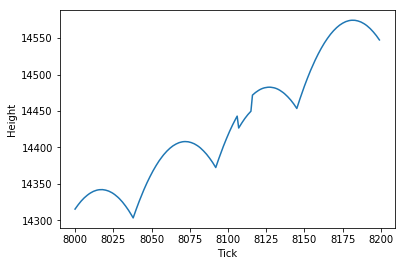

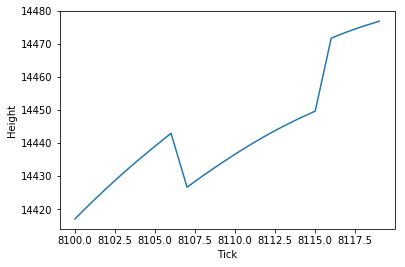

In [3]:
xs = []
ys = []
for i in range(8000, 8200):
    f = r.frames[i]
    xs.append(i)
    ys.append(f.pos[2])
    
plt.plot(xs, ys)
plt.xlabel('Tick')
plt.ylabel('Height')
plt.show()

xs = []
ys = []
for i in range(8100, 8120):
    f = r.frames[i]
    xs.append(i)
    ys.append(f.pos[2])
    
plt.plot(xs, ys)
plt.xlabel('Tick')
plt.ylabel('Height')
plt.show()

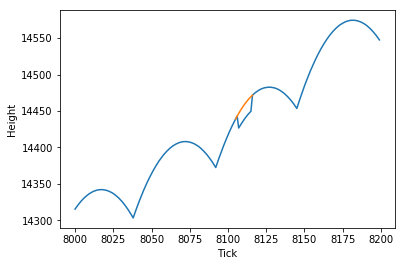

In [4]:
xs0 = []
ys0 = []
for i in range(8100, 8120):
    f = r.frames[i]
    if i <= 8105 or i >= 8116:
        xs0.append(i)
        ys0.append(f.pos[2])

fit = np.polyfit(xs0, ys0, 3)
p = np.poly1d(fit)

xs = []
ys = []
xs0 = []
ys0 = []
for i in range(8000, 8200):
    f = r.frames[i]
    xs.append(i)
    ys.append(f.pos[2])
    
    if 8105 <= i <=8116:
        f.pos[2] = p(i)
        xs0.append(i)
        ys0.append(f.pos[2])
    
plt.plot(xs, ys)
plt.plot(xs0, ys0)
plt.xlabel('Tick')
plt.ylabel('Height')
plt.show()

In [5]:
with open('output.recording', 'wt') as file:
    file.write(r.str())